In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


In [3]:
beer = pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head())

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0
3            4         14.1
4            2          9.4


In [4]:
mod_pois = smf.glm("beer_number ~ temperature", beer, family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 06 May 2018   Deviance:                       5.1373
Time:                        22:28:56   Pearson chi2:                     5.40
No. Iterations:                     4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [9]:
mod_pois_null = smf.glm("beer_number ~ 1", data = beer, family=sm.families.Poisson()).fit()
print("nullモデル:{:.3f}".format(mod_pois_null.aic))
print("変数入りモデル:{:.3f}".format(mod_pois.aic))

nullモデル:223.363
変数入りモデル:119.343


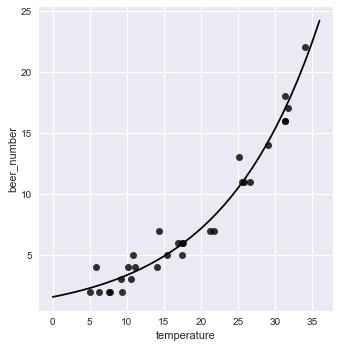

In [11]:
x_plot = np.arange(0,37)
pred = mod_pois.predict(pd.DataFrame({"temperature":x_plot}))
sns.lmplot(y = "beer_number", x = "temperature", data = beer, fit_reg = False,
          scatter_kws = {"color":"black"})
plt.plot(x_plot, pred, color="black")